In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
from random import choices
from scipy import stats

In [ ]:
%matplotlib inline

## 1. Overview

In [ ]:
n, p, w = 9, 0.5, 6

#### Generate binomial with numpy or scipy

In [ ]:
np.random.binomial(1, p, n)

array([0, 1, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
stats.binom.rvs(1, p, size=n)

array([1, 1, 1, 0, 0, 1, 1, 1, 1])

#### Density function of a binomial

In [ ]:
stats.binom.pmf(w, n, p)

0.16406250000000006

#### Grid search

In [ ]:
NUM_POINTS = 1001
p_grid = np.linspace(0, 1, NUM_POINTS)
prob_p = np.ones(NUM_POINTS)
prob_data = stats.binom.pmf(w, n, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / sum(posterior)

In [ ]:
posterior.mean()

0.0009990009990009992

In [ ]:
prob_data

array([0.00000000e+00, 8.37482519e-17, 5.34380847e-15, ...,
       6.63976213e-07, 8.34972583e-08, 0.00000000e+00])

Text(0.5, 1.0, 'The density of P posterior distribution')

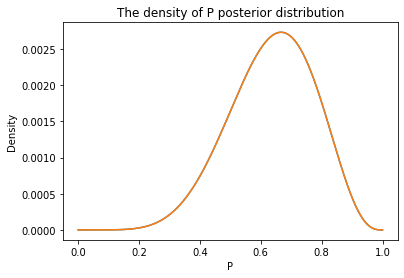

In [ ]:
aux = pd.DataFrame(posterior).reset_index().rename({0:"prob"}, axis=1)
aux['p'] = aux.index/(NUM_POINTS-1)
aux = pd.DataFrame(posterior).reset_index().rename({0:"prob"}, axis=1)
aux['p'] = aux.index/(NUM_POINTS-1)

plt.plot(aux['p'], aux['prob'])
plt.xlabel("P")
plt.ylabel("Density")
plt.title("The density of P posterior distribution")
plt.plot(aux['p'], aux['prob'])
plt.xlabel("P")
plt.ylabel("Density")
plt.title("The density of P posterior distribution")

#### Excerise 1: 8 water in 15 tosses

In [ ]:
n, p, w = 15, 0.5, 8

NUM_POINTS = 1001
p_grid = np.linspace(0, 1, NUM_POINTS)
prob_p = np.ones(NUM_POINTS)
prob_data = stats.binom.pmf(w, n, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / sum(posterior)

In [ ]:
samples = pd.DataFrame(np.random.choice(p_grid, 5000, p=posterior))\
            .reset_index()\
            .rename({0:'prob'}, axis=1)

print("The posterior mean:", round(np.mean(samples.prob),2))
np.percentile(np.array(samples.prob), 0.5), np.percentile(np.array(samples.prob), 99)

The posterior mean: 0.53


(0.240995, 0.7920100000000002)

Text(0.5, 1.0, 'The density of P posterior distribution')

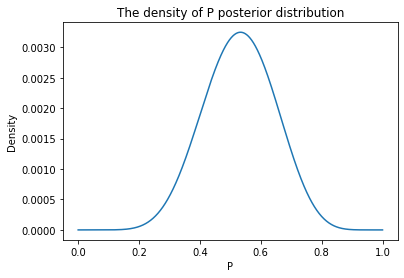

In [ ]:
aux = pd.DataFrame(posterior).reset_index().rename({0:"prob"}, axis=1)
aux['p'] = aux.index/(NUM_POINTS-1)

plt.plot(aux['p'], aux['prob'])
plt.xlabel("P")
plt.ylabel("Density")
plt.title("The density of P posterior distribution")

#### Excercise 2: different prior

In [ ]:
NUM_POINTS//2

500

In [ ]:
n, p, w = 9, 0.5, 6

NUM_POINTS = 1001
p_grid = np.linspace(0, 1, NUM_POINTS)
prob_p = np.concatenate((np.zeros(NUM_POINTS//2), np.ones(NUM_POINTS - NUM_POINTS//2)))
prob_p = prob_p / sum(prob_p)
prob_data = stats.binom.pmf(w, n, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / sum(posterior)

Text(0.5, 1.0, 'The density of P posterior distribution')

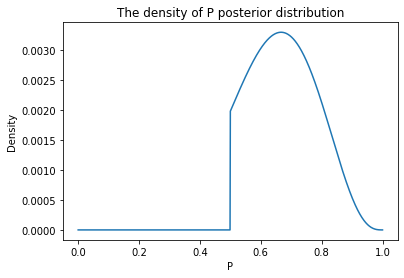

In [ ]:
aux = pd.DataFrame(posterior).reset_index().rename({0:"prob"}, axis=1)
aux['p'] = aux.index/(NUM_POINTS-1)

plt.plot(aux['p'], aux['prob'])
plt.xlabel("P")
plt.ylabel("Density")
plt.title("The density of P posterior distribution")

#### Sample the posterior

In [ ]:
samples = pd.DataFrame(np.random.choice(p_grid, 5000, p=posterior))\
            .reset_index().rename({0:'prob'}, axis=1)

samples.head()

,index,prob
0,0,0.573
1,1,0.737
2,2,0.452
3,3,0.788
4,4,0.490


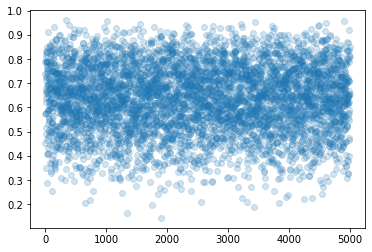

In [ ]:
plt.plot(samples.index, samples.prob, linestyle = 'None', marker='o', alpha=0.2)